# Project: Investigate Tmdb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Overview
Well what do we have here
We have data on movies produced from 1961 to 2015 (50 years)
In addition to some attributes such as directors, production companies, budget, revenues, and of course the year of production of each movie, in addition to the genres to which it belongs 
What will happen here is the clean and organize our data such as handle nulls, removing duplicates, removing unimportant elements and add some columns or dataframes if needed
To prepare the data for analysis and answering questions 

>َQuestions to be answered
- What is the most produced genre for each year ?
- What is the most and least produced genre for all years ?
- How genres changed over years?
- What is the top 5 movies based on rating count and rating average?
- If I was an open budget investor, what would be the specifications of the movie I would invest in (cast, director, genre, runtime and production company) to ensure the highest possible profit?
- Has the amount of film production increased or decreased over time?
- How has total profit changed from 1961 to 2015?
- what is the market share between production companies for 2010?

In [167]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#change exponential form to the normal numerical form for big numbers
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

>We have put the questions..
Well, it's time to clean up and preprocess our data

### General Properties

In [168]:
# loading our data and take a look 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [169]:
# to look at the columns we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

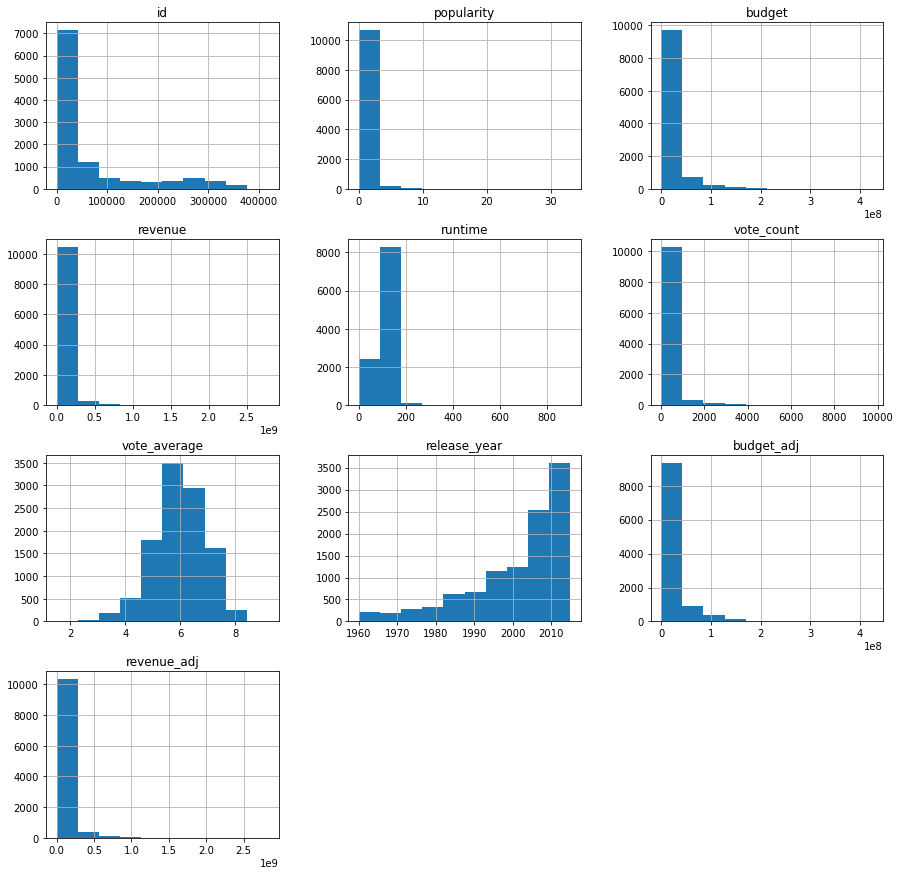

In [170]:
# histograms of numerical data
df.hist(figsize = (15,15));

In [171]:
# a fast look into some statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


## Required changes

-Probelm:There're some columns have a lot of 0 value :

>Solution: Replacing 0 values with NaN values then remove NaN values to ge the right statistics


-Problem:There're some columns are usless in our questions such ['id' , 'imdb_id' , 'homepage' , 'tagline' , 'keywords' , 'overview' , 'release_date']

>Solution: simply drop them

-Problem: Many columns have a Multiple values separated by '|' and that will hinder me a little 

>Soution: Separate the values into as many columns as needed

In [172]:
#some columns have a lot of 0 value .. transform into NaN and remove them

zero_to_NaN_col = ['budget','revenue','runtime','budget_adj','revenue_adj']

df[zero_to_NaN_col] = df[zero_to_NaN_col].replace(0, np.NaN)
df.dropna(axis = 0, inplace = True)


### Data Cleaning 
>All cleaning magic happens here

>I will provide a comment with each cell for explaination

In [173]:
# seperate columns with multiple values
# https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/


df1 = (df['director'].str.split('|', expand = True).rename(columns = lambda x: f"director_{x+1}"))
df2 = (df['cast'].str.split('|', expand = True).rename(columns = lambda x: f"cast_{x+1}"))
df3 = (df['genres'].str.split('|', expand = True).rename(columns = lambda x: f"gener_{x+1}"))
df4 = (df['production_companies'].str.split('|', expand = True).rename(columns = lambda x: f"production_company_{x+1}"))
#check
df2.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [174]:
# Join the seperated columns to the original df and remove unwanted columns
cols_to_del = ['director' , 'cast' , 'genres' , 'production_companies' , 'id' , 'imdb_id' , 'homepage' , 'tagline' , 'keywords' , 'overview' , 'release_date'] 
df = df.join([df1, df2, df3, df4])
df.drop(cols_to_del, axis = 1 , inplace = True)

In [175]:
# check for duplicates
df.duplicated().sum()

0

In [176]:
# ensure that our columns are ok
df.info()
#it`s all ok

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1287 non-null   float64
 1   budget                1287 non-null   float64
 2   revenue               1287 non-null   float64
 3   original_title        1287 non-null   object 
 4   runtime               1287 non-null   float64
 5   vote_count            1287 non-null   int64  
 6   vote_average          1287 non-null   float64
 7   release_year          1287 non-null   int64  
 8   budget_adj            1287 non-null   float64
 9   revenue_adj           1287 non-null   float64
 10  director_1            1287 non-null   object 
 11  director_2            110 non-null    object 
 12  director_3            11 non-null     object 
 13  director_4            1 non-null      object 
 14  director_5            1 non-null      object 
 15  director_6          

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1.1:
#### What is the most produced genre for each year ? 
<a id='Q1.1'></a> 

In [177]:
# select only information will be used [all rows , (year and genres columns)]
genres = df.iloc[np.arange(0,df.shape[0]) , [7,21,22,23,24,25]]

# array of unique years 
years = genres['release_year'].unique() 

# list of tuples for most common genres in specific years ... (year , genre)
most_produced = [] 

# most_produced list
for year in years:
    x = genres[genres['release_year'] == year]
    y = x.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count using idxmax()
    z = y.stack().value_counts().idxmax()
    
    most_produced.append((year, z))
    
df_most_popular = pd.DataFrame(most_produced, columns=['release_year', 'Most Popular Genre']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,Most Popular Genre
0,1961,Comedy
1,1962,Adventure
2,1963,Action
3,1964,Adventure
4,1965,Adventure
5,1967,Action
6,1969,Adventure
7,1971,Thriller
8,1972,Drama
9,1973,Thriller


### Research Question 1.2:
#### What is the most and least produced genre for all years ? 
<a id='Q1.2'></a> 

In [178]:
# make a dataframe with only genres
g = df_most_popular.copy()
g.drop(columns = ['release_year'] , inplace = True)

# creating a dataframe that have the count of the most and least genres for all years
Most_Least_all_yrs = pd.DataFrame(data=[g.stack().value_counts().idxmin(),g.stack().value_counts().idxmax()]
               ,index=['Least' , 'Most'],columns=['Type'])
Most_Least_all_yrs

,Type
Least,Family
Most,Drama


### Research Question 2:
#### How movie genres changed from 2010 to 2015?


In [179]:
# Creating a dataframes having only genres in 2010 and 2015
df15 = genres.query('release_year == 2015').copy()
df15 = df15.drop('release_year', axis = 1)

df10 = genres.query('release_year == 2010').copy()
df10 = df10.drop('release_year', axis = 1)

# creating a dataframes have the counts of genres
df15 = df15.stack().value_counts()
df10 = df10.stack().value_counts()

In [180]:
# check if the two dataframes having the same index or not
df15.index.sort_values() , df10.index.sort_values()

# okay they seem different

(Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
        'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
        'Science Fiction', 'Thriller', 'War', 'Western'],
       dtype='object'),
 Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
        'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Mystery',
        'Romance', 'Science Fiction', 'Thriller', 'Western'],
       dtype='object'))

In [181]:
# Matching columns
df15['Documentary'] = 0
df15['Foreign'] = 0
df10['Music'] = 0
df10['War'] = 0
df15.index.sort_values() == df10.index.sort_values()

# Now we are good

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<a id='Q2'></a> 

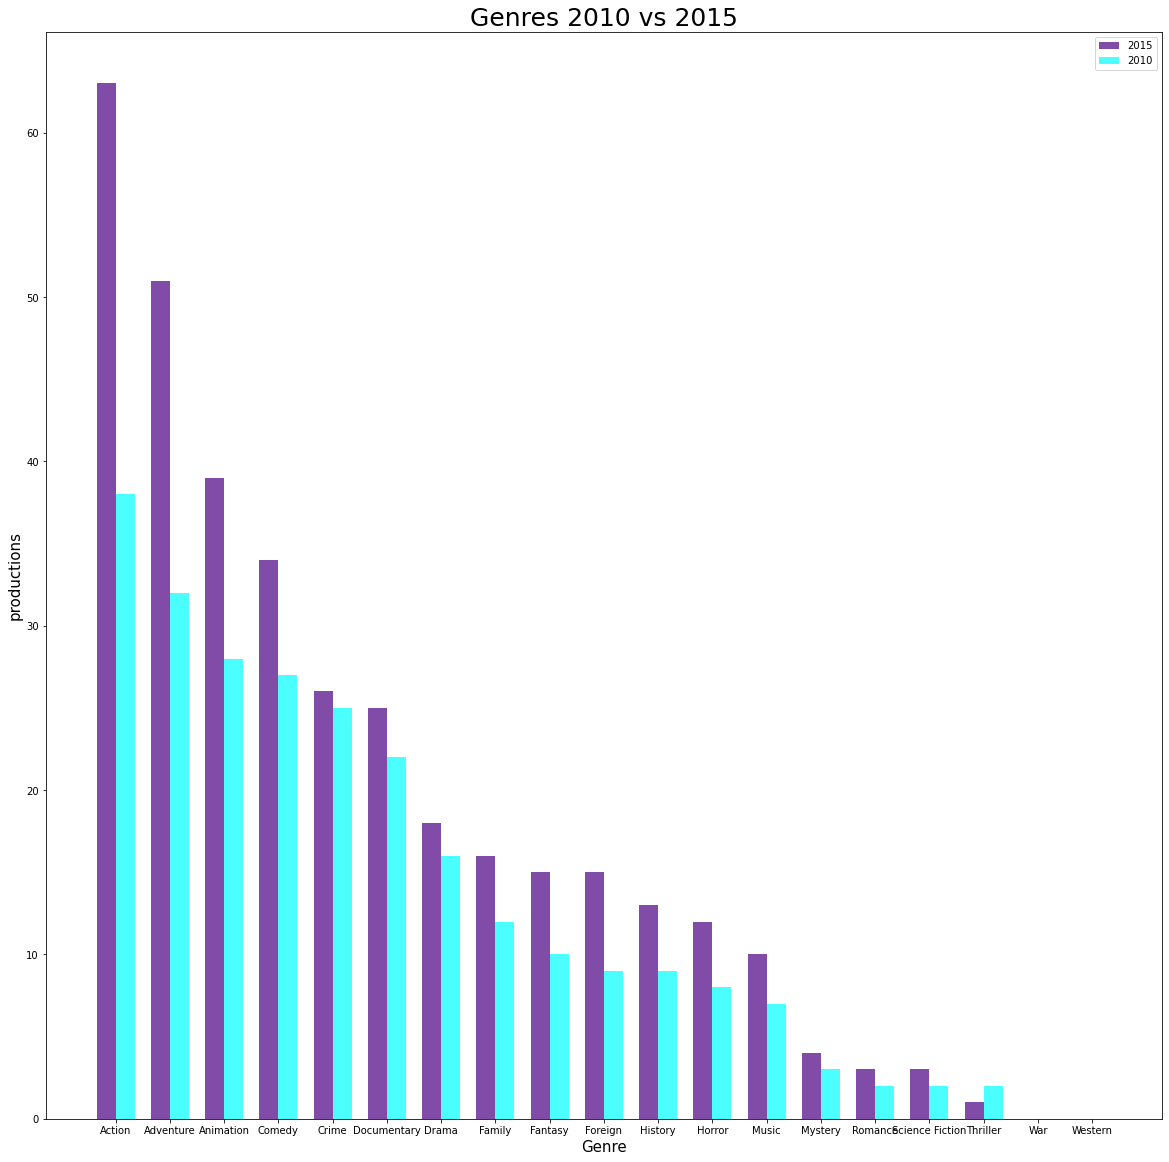

In [183]:
# Creating [double bar] bar chart
labels = df10.index.sort_values()
ind = np.arange(len(df10))  
width = 0.35       

bar10 = plt.bar(ind, df10, width, color='indigo', alpha=.7, label='2015')
bar15 = plt.bar(ind + width, df15, width, color='cyan', alpha=.7, label='2010')


plt.ylabel('productions' , fontsize = 15)
plt.xlabel('Genre' , fontsize = 15)
plt.title('Genres 2010 vs 2015' , fontsize = 25)
locations = ind + width / 2  
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (20,20)

plt.legend();

### Research Question 3:
#### What is the top 5 movies based on rating count and rating average?


In [145]:
# Creating the necessary dataframe  
top = df.iloc[np.arange(0,df.shape[0]) , [3,5,6,7]]
top.head()

,original_title,vote_count,vote_average,release_year
0,Jurassic World,5562,6.50,2015
1,Mad Max: Fury Road,6185,7.10,2015
2,Insurgent,2480,6.30,2015
3,Star Wars: The Force Awakens,5292,7.50,2015
4,Furious 7,2947,7.30,2015


In [184]:
# getting the top 5 vote_count movies
top = top.nlargest(5,'vote_count').reset_index().drop(['index'], axis=1)
top

,original_title,vote_count,vote_average,release_year
0,Inception,9767,7.90,2010
1,The Avengers,8903,7.30,2012
2,Avatar,8458,7.10,2009
3,The Dark Knight,8432,8.10,2008
4,Django Unchained,7375,7.70,2012


<a id='Q3'></a> 

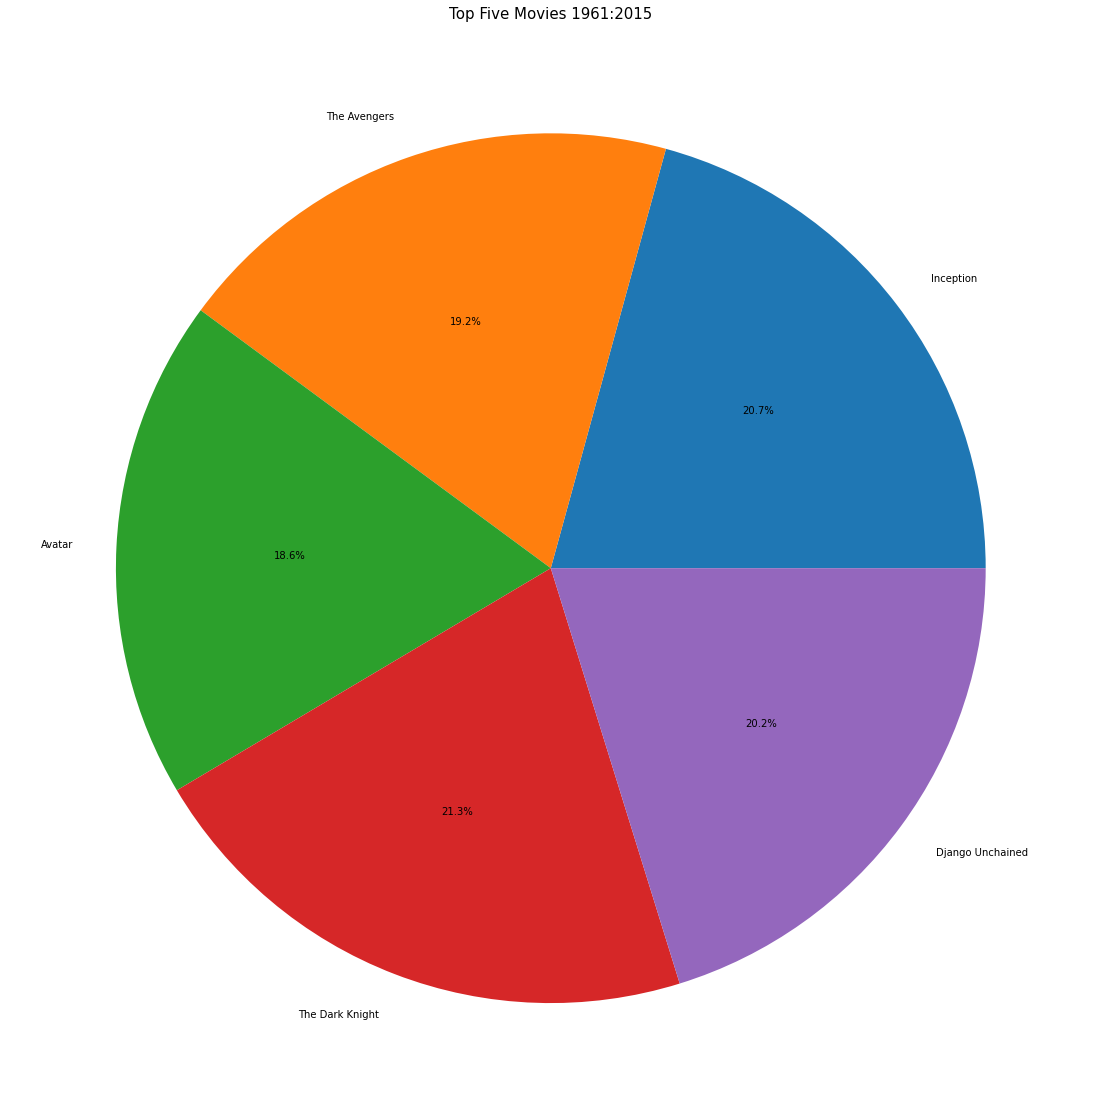

In [185]:
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

slices = top['vote_average'].tolist()
labels = top['original_title'].tolist()
plt.title('Top Five Movies 1961:2015' , fontsize = 15)
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(slices , labels = labels , autopct = '%1.1f%%');

### Research Question 4:
#### If I was an open budget investor, what would be the specifications of the movie I would invest in (cast, director, genre, runtime and production company) to ensure the highest possible profit?

In [186]:
# Creating a dataframe contains the necessary data

df_revenue = df.iloc[ np.arange(0,df.shape[0]) , [4,8,9,10,16,21,26]]

# Creating a new columns 'Profits'
df_revenue['profits'] = df_revenue['revenue_adj'] - df_revenue['budget_adj'] 

# Getting the movies data with the top 100 profits
top_100_profits = df_revenue.nlargest(100,'profits')
top_100_profits.drop(['budget_adj' , 'revenue_adj'] ,axis = 1 , inplace = True)
top_100_profits.head(2)

,runtime,director_1,cast_1,gener_1,production_company_1,profits
1329,121.00,George Lucas,Mark Hamill,Adventure,Lucasfilm,2750136650.92
1386,162.00,James Cameron,Sam Worthington,Action,Ingenious Film Partners,2586236847.52


<a id='Q4'></a> 

In [187]:
# Creating dataframe contains the best of everything

choice = [top_100_profits['runtime'].value_counts().idxmax() 
          , top_100_profits['director_1'].value_counts().idxmax()
          ,top_100_profits['cast_1'].value_counts().idxmax()
          ,top_100_profits['gener_1'].value_counts().idxmax()
          ,top_100_profits['production_company_1'].value_counts().idxmax()
          ]

labels = top_100_profits.columns.tolist()
del labels[-1]

df_choice = pd.DataFrame(choice , index = labels)
print('\nSo if i would choose\nThat will be my choice to ensure profits')
print('-'*40)
df_choice


So if i would choose
That will be my choice to ensure profits
----------------------------------------


,0
runtime,130.00
director_1,Steven Spielberg
cast_1,Daniel Radcliffe
gener_1,Adventure
production_company_1,Walt Disney Pictures


### Research Question 5:
#### Has the amount of film production increased or decreased over time? 

In [188]:
# Creating a list contains every year 1961 : 2015 and sort it asc

year = df['release_year'].unique().tolist()
year.sort()

# Creating a list contains the count of movies for each year
num = df.groupby(['release_year'])['original_title'].count().tolist()

movie_per_year = pd.DataFrame(list(zip(year, num)),
               columns =['Year', 'Number of Movies'])
movie_per_year

,Year,Number of Movies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


<a id='Q5'></a> 

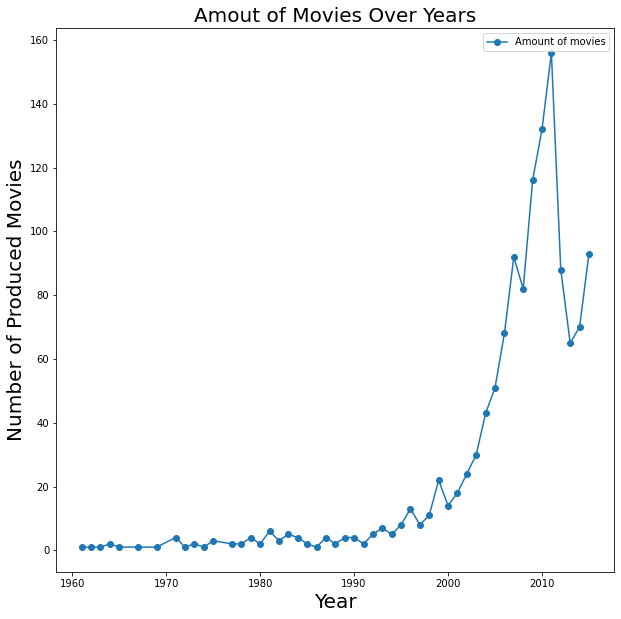

<Figure size 1080x720 with 0 Axes>

In [189]:
# Plotting the previous result

plt.xlabel('Year' , fontsize = 20)
plt.ylabel('Number of Produced Movies' , fontsize = 20)
plt.title('Amout of Movies Over Years', fontsize = 20);

plt.plot(movie_per_year['Year'], movie_per_year['Number of Movies'] , marker = 'o')
plt.legend(['Amount of movies'])
plt.figure(figsize=(15,10));


### Research Question 6:
#### How has total profit changed from 1961 to 2015?

In [190]:
# Creating a list with the profits for each year


df_revenue['release_year'] = df['release_year']
profits = df_revenue.groupby('release_year')['profits'].sum().tolist()

In [191]:
# Creating a dataframe contains year and profit

profit_per_year = pd.DataFrame(list(zip(year , profits))
                              ,columns = ['Year' , 'Total Profits'])

profit_per_year

,Year,Total Profits
0,1961,7294861.21
1,1962,421694259.41
2,1963,543972910.57
3,1964,856993456.93
4,1965,901027343.84
5,1967,667304134.05
6,1969,445668194.74
7,1971,916931752.89
8,1972,1246626366.80
9,1973,2888174276.43


<a id='Q6'></a> 

<Figure size 1440x720 with 0 Axes>

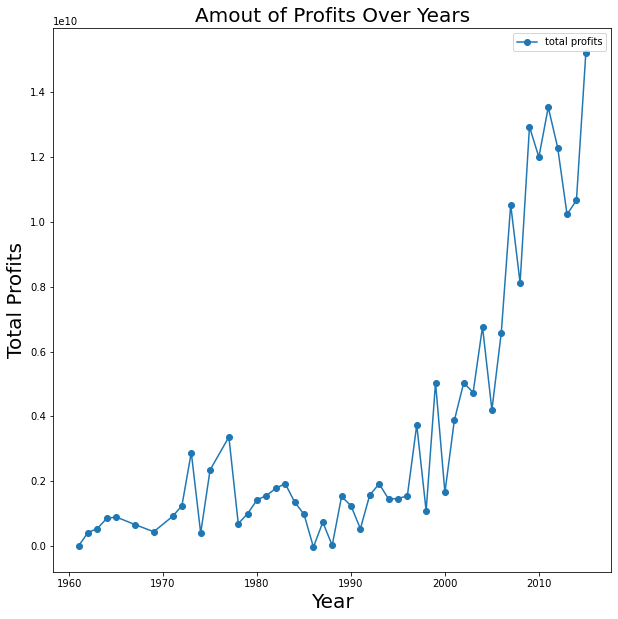

<Figure size 1440x720 with 0 Axes>

In [192]:
# Plotting the previous result

plt.xlabel('Year' , fontsize = 20)
plt.ylabel('Total Profits' , fontsize = 20)
plt.title('Amout of Profits Over Years', fontsize = 20);
plt.plot(profit_per_year['Year'], profit_per_year['Total Profits'] , marker = 'o')
plt.legend(['total profits'])
plt.figure(figsize = (20,10))

### Research Question 7:
#### What is the market share between best 5 production companies for 2010?

In [193]:
# Creating a df for each company then append them together in one column to be easily access and describe

company1 = df['production_company_1']
company2 = df['production_company_2']
company3 = df['production_company_3']
company4 = df['production_company_4']
company5 = df['production_company_5']


company1 = company1.append(company2 , ignore_index = True)
company1 = company1.append(company3 , ignore_index = True)
company1 = company1.append(company4 , ignore_index = True)
company1 = company1.append(company5 , ignore_index = True)

# Drop NaN values
company1.dropna(axis = 0 , inplace = True)

In [194]:
# Creating two lists contain company names and company share

x1 = company1.value_counts()
companies_list = x1.index.tolist()[0:5]
share_list = x1.tolist()[0:5]

<a id='Q7'></a> 

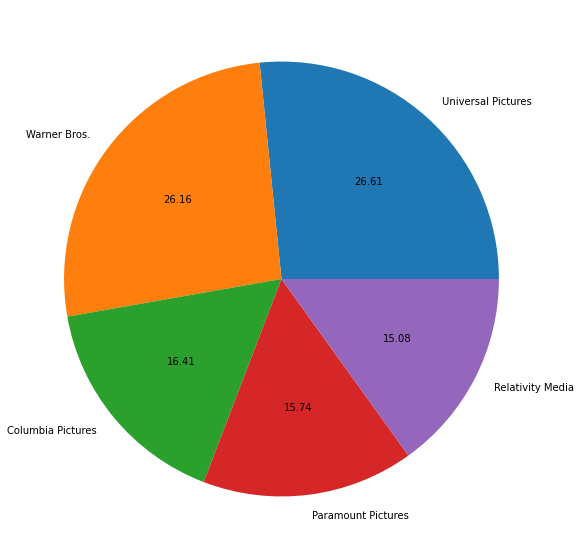

In [195]:
# Plotting previous result

plt.pie(share_list , labels = companies_list , autopct='%.2f');

<a id='conclusions'></a>
## Conclusions

### - Q1.1: What is the most produced genre for each year?
- actually it was a surprising results as the most popular genre differed a lot, you can see the table: <li><a href="#Q1.1">here</a></li>

### - Q1.2: What is the most and least produced genre for all years?
- The least genre is: Family
- The most genre is: Drama
- You can see the table: <li><a href="#Q1.2">here</a></li>

### - Q2: How movie genres produced in 2015 combared with 2010?
- in 2015 all increased except thriller movies was less than 2010, you can see the graph: <li><a href="#Q2">here</a></li>

### - Q3: What is the top 5 movies based on rating count and rating average?
- The top 5 movies are:[The Dark Knight, Inception, Avatar, The Avengers, Django Unchained] and you can see the pie chart: <li><a href="#Q3">here</a></li>

### - Q4: If I was an open budget investor, what would be the specifications of the movie I would invest in (cast,          director, genre, runtime and production company) to ensure the highest possible profit?
- I think you've to choose the director Steven Spielberg and the actor Daniel Radcliffe in a movie in Adventure genre produced by Walt Disney Pictures and the movie duration 130 minutes a little less or more, you can see the table: <li><a href="#Q4">here</a></li>

### - Q5: Has the amount of movie production increased or decreased over time?
- Significant increasing in amount of movie production from 1961 to 2015.we can see that from 1961 to 1983 not more than 100 movies were prodcued, while in only 2011 there were 156 movies produced., you can see the graph: <li><a href="#Q5">here</a></li>

### - Q6: How has total profit changed from 1961 to 2015?
- Of course it is in significant increasing, since the number of films was increasing greatly, then the revenues are increasing greatly And after calculating the profits, it was also clear that the profits are increasing significantly and continuously , you can see the graph: <li><a href="#Q6">here</a></li>

### - Q7: what is the market share between best 5 production companies for 2010?
- It was clear that 'Universal pictures' and 'Warner Bros' with '26.61%' and '26.16%' percentage was dominators in top 5 market share production companies, you can see the pie chart: <li><a href="#Q7">here</a></li>

## please pay attention: 
######  All results are limited to the underlying data set and as no advanced statistics were performed, the results can only be treated as indicators 

###### and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data